# Plot about Greenhouse Gas Emissions and its relations to Income per Capita and GDP


### vsg247

Data from year 2010, available at the World Bank website. 

In [39]:
import os
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
### A function to download the data in case it's not there yet. 

def get_PUI_csv(url, filename, zipname):
    '''
    Function that gets a csv file from an url, saves it in the PUIdata directory.
    If the file is already there, the function prints a message saying that.
    If the file is zipped, unzips it.
    '''
    
    print('Getting ' + filename + ' from ' + url)
    
    ### First check if the csv file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("File was already at the PUIdata directory.")
        
    elif os.path.isfile(os.getenv("PUIDATA") + "/" + zipname):
        print('ZIP File was already at the PUIdata directory.')
        
        # unzip the folder andsave it to the PUIdata  directory
        os.system("unzip " + os.getenv("PUIDATA") + "/" + zipname)
        print(zipname + ' unzipped.')
         
    else :
        # Download the File; move it to the PUIdata directory.
        print ("Downloading.")
        
        # Downloading the File
        os.system("curl -O " + url)
        print ("ZIP File downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + zipname + " " + os.getenv("PUIDATA"))
        
        # unzip the file
        os.system("unzip " + os.getenv("PUIDATA") + "/" + zipname + " -d" + os.getenv("PUIDATA") + "/")
        
                  
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue.")

In [3]:
# getting the data from the World Bank

url = 'databank.worldbank.org/data/download/WDI_csv.zip'
filename = 'WDI_Data.csv'
zipname = 'WDI_csv.zip'

get_PUI_csv(url, filename, zipname)


Getting WDI_Data.csv from databank.worldbank.org/data/download/WDI_csv.zip
File was already at the PUIdata directory.
File in place, you can continue.


In [4]:
# read wdi data
wdi = pd.read_csv(os.getenv("PUIDATA") + "/" + filename)
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.362348,NaN,86.280351,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.984231,NaN,73.917807,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93.839661,NaN,95.156730,NaN,NaN,NaN,NaN


In [5]:
# checking columns
wdi.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016'],
      dtype='object')

In [7]:
# focusing on 2010 data
wdi.drop([u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016'], axis = 1,  inplace = True)

In [28]:
# getting the data only from the following indicators:
# Adjusted net national income per capita (constant 2010 US$)
# CO2 emissions (kg per PPP $ of GDP) 
# CO2 emissions (metric tons per capita)

Income_pCap = wdi[wdi['Indicator Name'] == 'Adjusted net national income per capita (constant 2010 US$)']
CO2pGDP = wdi[wdi['Indicator Name'] == 'CO2 emissions (kg per PPP $ of GDP)'] 
CO2pCap = wdi[wdi['Indicator Name'] == 'CO2 emissions (metric tons per capita)']

In [29]:
Income_pCap = Income_pCap.loc[:, ['Country Code', '2010']]
Income_pCap.rename(columns = {'Country Code': 'Code', '2010':'Income_pCap'}, inplace = True)
Income_pCap.head()

,Code,Income_pCap
24,ARB,4330.612719
1464,CSS,6478.825475
2904,CEB,9982.112664
4344,EAR,2475.098297
5784,EAS,6231.343907


In [30]:
CO2pGDP = CO2pGDP.loc[:, ['Country Code', '2010']]
CO2pGDP.rename(columns = {'Country Code': 'Code', '2010':'CO2pGDP'}, inplace = True)
CO2pGDP.head()

,Code,CO2pGDP
207,ARB,0.328962
1647,CSS,0.692931
3087,CEB,0.333215
4527,EAR,0.312712
5967,EAS,0.493621


In [32]:
CO2pCap = CO2pCap.loc[:, ['Country Code', '2010']]
CO2pCap.rename(columns = {'Country Code': 'Code', '2010':'CO2pCap'}, inplace = True)
CO2pCap.head()

,Code,CO2pCap
209,ARB,4.672506
1649,CSS,9.599531
3089,CEB,6.822252
4529,EAR,2.129653
5969,EAS,5.701796


In [34]:
# joining the data
df = pd.merge(Income_pCap, CO2pGDP, on='Code')
df.head()

,Code,Income_pCap,CO2pGDP
0,ARB,4330.612719,0.328962
1,CSS,6478.825475,0.692931
2,CEB,9982.112664,0.333215
3,EAR,2475.098297,0.312712
4,EAS,6231.343907,0.493621


In [35]:
# joining step 2
df = pd.merge(df, CO2pCap, on='Code')
df.head()

,Code,Income_pCap,CO2pGDP,CO2pCap
0,ARB,4330.612719,0.328962,4.672506
1,CSS,6478.825475,0.692931,9.599531
2,CEB,9982.112664,0.333215,6.822252
3,EAR,2475.098297,0.312712,2.129653
4,EAS,6231.343907,0.493621,5.701796


In [37]:
df.dropna(inplace = True)
df.describe()

,Income_pCap,CO2pGDP,CO2pCap
count,211.000000,211.000000,211.000000
mean,9223.702648,0.281122,4.674020
std,13130.844961,0.186269,5.900453
min,130.954724,0.023060,0.022480
25%,1099.461273,0.169322,0.735878
50%,3490.984155,0.243637,2.622539
75%,9276.239300,0.342902,6.825787
max,65441.570736,1.230855,41.131162


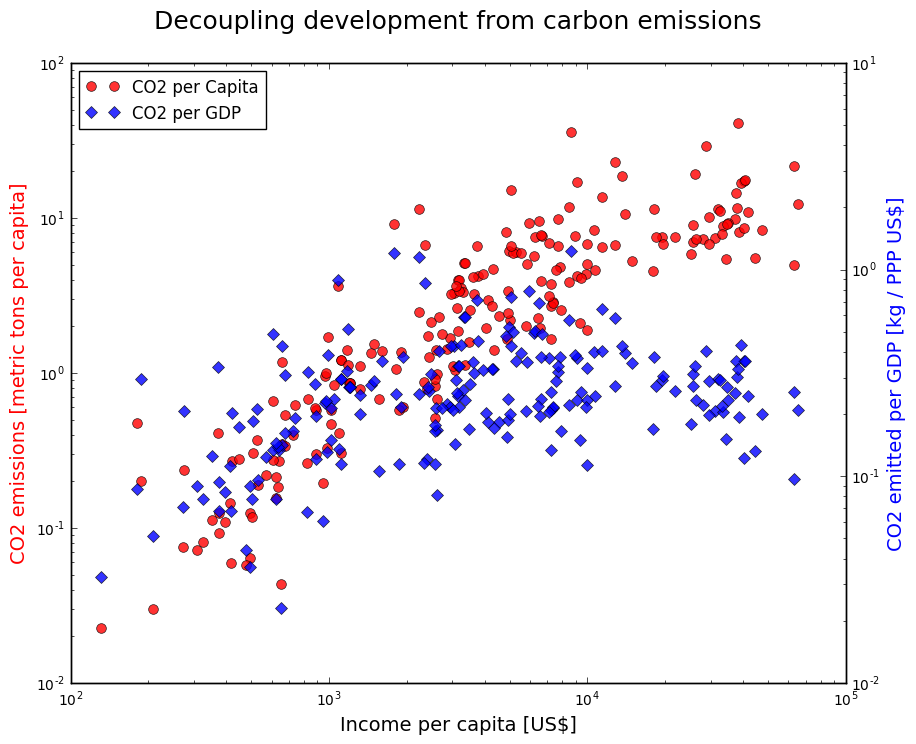

In [109]:
# making the plot

fig, ax1 = pl.subplots(figsize = (10, 8))

ax2 = ax1.twinx()

p1 = ax1.plot(df.Income_pCap, df.CO2pCap, 'ro', ms=7, alpha=0.8)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Income per capita [US$]', fontsize = 14)
ax1.set_ylabel('CO2 emissions [metric tons per capita]', color  = 'r', fontsize = 14)


p2 = ax2.plot(df.Income_pCap, df.CO2pGDP, 'bD', ms=6, alpha=0.8)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('CO2 emitted per GDP [kg / PPP US$]', color = 'b', fontsize = 14)

p = p1+p2
plabs = ['CO2 per Capita', 'CO2 per GDP']
pl.legend(p, plabs, loc=2)

pl.title('Decoupling development from carbon emissions\n', fontsize = 18)

pl.show()



### *Figure 1*: Observing the relation between carbon emissions and income per capita it is clear the positive correlation between both. On the other hand, for the CO2 emissions per GDP trend, it is possible to observe a positive correlation up until an income per capita of about 4,000 to 10,000 US dollars, but about that treshold, there is no more correlation, or even a slightly negative correlation. The result indicates that after a certain stage  of technological development (high enough income per capita), the developed countries have decoupled their developoment (represented by the GDP increase) from their CO2 emissions.  